# Plot stats of the band flags

Plot a histogram for some key g and k bands as a function of PanSTARRS g magnitude

In [10]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib as mpl
mpl.use('pdf')
import matplotlib.pyplot as plt
import pyvo as vo
import time

import numpy as np

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
service = vo.dal.TAPService(
    "https://herschel-vos.phys.sussex.ac.uk/__system__/tap/run/tap"
)

In [3]:
flag_query="""SELECT
m_gpc1_g,
flag_mmt_g, 
flag_omegacam_g, 
flag_suprime_g, 
flag_megacam_g, 
flag_wfc_g, 
flag_gpc1_g, 
flag_decam_g, 
flag_90prime_g, 
flag_sdss_g,
flag_isaac_k, 
flag_moircs_k, 
flag_ukidss_k, 
flag_newfirm_k, 
flag_wircs_k, 
flag_hawki_k,
flag_wircam_ks, 
flag_vista_ks, 
flag_moircs_ks, 
flag_omega2000_ks, 
flag_tifkam_ks
FROM herschelhelp.main
WHERE m_gpc1_g IS NOT NULL"""

In [15]:
job = service.submit_job(flag_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
flags = result.table

Job COMPLETED after 595 seconds.


In [18]:
flags.write('./data/flags.fits', overwrite=True)

In [ ]:
#flags = Table.read('./data/flags.fits')

In [16]:
len(flags)

16473810

In [19]:
flags[:10].show_in_notebook()

idx,m_gpc1_g,flag_mmt_g,flag_omegacam_g,flag_suprime_g,flag_megacam_g,flag_wfc_g,flag_gpc1_g,flag_decam_g,flag_90prime_g,flag_sdss_g,flag_isaac_k,flag_moircs_k,flag_ukidss_k,flag_newfirm_k,flag_wircs_k,flag_hawki_k,flag_wircam_ks,flag_vista_ks,flag_moircs_ks,flag_omega2000_ks,flag_tifkam_ks
,mag,,,,,,,,,,,,,,,,,,,,
0,22.8649997711182,--,--,--,--,--,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--
1,21.6070003509521,--,--,--,--,--,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--
2,20.7877006530762,--,--,--,--,--,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--
3,23.6667995452881,--,--,--,--,--,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--
4,21.6905002593994,--,--,--,--,--,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--
5,22.8159008026123,--,--,--,--,--,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--
6,23.5333995819092,--,--,--,--,--,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--
7,22.300500869751,--,--,--,--,--,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--
8,16.4899005889893,--,--,--,--,--,False,--,--,--,--,--,--,--,--,--,--,--,--,--,--


In [14]:
np.unique(flags['flag_mmt_g'])

False
True


In [11]:
bins = np.linspace(10, 30, 100)

In [21]:
flag_cols = [
    "flag_mmt_g", 
    "flag_omegacam_g", 
    "flag_suprime_g", 
    "flag_megacam_g", 
    "flag_wfc_g", 
    "flag_gpc1_g", 
    "flag_decam_g", 
    "flag_90prime_g", 
    "flag_sdss_g",
    "flag_isaac_k", 
    "flag_moircs_k", 
    "flag_ukidss_k", 
    "flag_newfirm_k", 
    "flag_wircs_k", 
    "flag_hawki_k",
    "flag_wircam_ks", 
    "flag_vista_ks", 
    "flag_moircs_ks", 
    "flag_omega2000_ks", 
    "flag_tifkam_ks"
]

In [22]:
def make_flag_counts(table, bins, flag_col):
    frac = np.full(len(bins)-1, np.nan)
    for n, b in enumerate(bins[:-1]):
        mask = table['m_gpc1_g'] > bins[n]
        mask &= table['m_gpc1_g'] < bins[n+1]
        flagged = np.sum(table[mask][flag_col])
        not_flagged = np.sum(~table[mask][flag_col])
        frac[n] = flagged/not_flagged
    return frac
        

In [37]:
flag_counts = {}
for col in flag_cols:
    print("{} total: {}, True: {}, False: {}".format(
        col,
        np.sum(~flags[col].mask), 
        np.sum(flags[col]), 
        np.sum(~flags[col])
    ))
    flag_counts.update({col: make_flag_counts(flags, bins, col)})

flag_mmt_g: total: 55742, True: 0, False: 55742


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Warning: converting a masked element to nan.


flag_omegacam_g: total: 5055312, True: 0, False: 5055312
flag_suprime_g: total: 11031667, True: 0, False: 11031667
flag_megacam_g: total: 9127570, True: 0, False: 9127570
flag_wfc_g: total: 979238, True: 0, False: 979238
flag_gpc1_g: total: 16473810, True: 12595, False: 16461215
flag_decam_g: total: 11799615, True: 402, False: 11799213
flag_90prime_g: total: 3303325, True: 0, False: 3303325
flag_sdss_g: total: 6382965, True: 0, False: 6382965
flag_isaac_k: total: 0, True: 0.0, False: 0.0
flag_moircs_k: total: 9543, True: 0, False: 9543
flag_ukidss_k: total: 14065742, True: 0, False: 14065742
flag_newfirm_k: total: 55742, True: 0, False: 55742
flag_wircs_k: total: 55742, True: 2, False: 55740
flag_hawki_k: total: 361338, True: 0, False: 361338
flag_wircam_ks: total: 6933990, True: 0, False: 6933990
flag_vista_ks: total: 11799615, True: 0, False: 11799615
flag_moircs_ks: total: 55742, True: 0, False: 55742
flag_omega2000_ks: total: 55742, True: 0, False: 55742
flag_tifkam_ks: total: 0, T

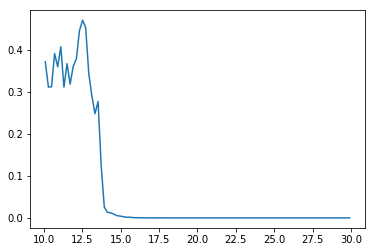

In [40]:
fig, ax = plt.subplots()

ax.plot(bins[:-1]+(bins[1] - bins[0])/2, flag_counts['flag_gpc1_g'], label=f)
    
#ax.legend()
#ax.set_xscale([15,26])
#ax.set_yscale(0,1)
    

In [44]:
gpc_query="""SELECT
m_gpc1_g,
flag_gpc1_g, 
m_gpc1_r,
flag_gpc1_r, 
m_gpc1_i,
flag_gpc1_i, 
m_gpc1_z,
flag_gpc1_z, 
m_gpc1_y,
flag_gpc1_y
FROM herschelhelp.main
WHERE m_gpc1_g IS NOT NULL
OR m_gpc1_r IS NOT NULL
OR m_gpc1_i IS NOT NULL
OR m_gpc1_z IS NOT NULL
OR m_gpc1_y IS NOT NULL
"""

In [45]:
job = service.submit_job(gpc_query)
job.run()
job_url = job.url
job_result = vo.dal.tap.AsyncTAPJob(job_url)
start_time = time.time()
wait = 5.
while job.phase == 'EXECUTING':
    
    time.sleep(wait) #wait and try again
    #wait *= 2

print('Job {} after {} seconds.'.format(job.phase, round(time.time() - start_time)))

result = job_result.fetch_result()
gpcflags = result.table

Job COMPLETED after 603 seconds.


In [46]:
gpc_counts = {}
for col in ['g','r','i','z','y']:
    col = "flag_gpc1_{}".format(col)
    print("{} total: {}, True: {}, False: {}".format(
        col,
        np.sum(~gpcflags[col].mask), 
        np.sum(gpcflags[col]), 
        np.sum(~gpcflags[col])
    ))
    gpc_counts.update({col: make_flag_counts(gpcflags, bins, col)})

flag_gpc1_g total: 17754704, True: 12682, False: 17742022


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


flag_gpc1_r total: 17754704, True: 17004, False: 17737700
flag_gpc1_i total: 17754704, True: 16475, False: 17738229
flag_gpc1_z total: 17754704, True: 14029, False: 17740675
flag_gpc1_y total: 17754704, True: 6485, False: 17748219


/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


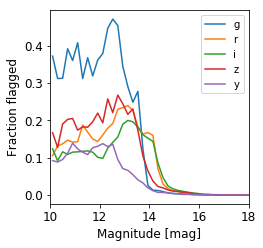

In [52]:
fig, ax = plt.subplots()

ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_g'], label='g')
ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_r'], label='r')
ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_i'], label='i')
ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_z'], label='z')
ax.plot(bins[:-1]+(bins[1] - bins[0])/2, gpc_counts['flag_gpc1_y'], label='y')

ax.set_xlim(10,18)
ax.set_xlabel("Magnitude [mag]")
ax.set_ylabel("Fraction flagged")
legend = ax.legend( markerscale=2)

plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm / 1.0
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/flags.pdf', bbox_inches='tight')
plt.savefig('./figs/flags.png', bbox_inches='tight')